<div style="border:3px solid black; padding:10px">

# Goal: Generate Wordcloud from Instances in Pandas Dataframe

# Steps
<ol>
    <li>Import Data</li>
    <li>Tokenize the text for each row in pandas column</li>
    <li>Standardize text by converting tokens to base words</li>
    <li>Plot each wordcloud</li>   
</ol>

</div>

# Import Dependencies

In [1]:
%%capture

# Dataframe
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
# Visualize wordcloud
from wordcloud import WordCloud, STOPWORDS

# Import Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Import Data
 - <code>pd.read_csv('file')</code>
 - Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
result = pd.read_csv('data/valence_df.csv')

# Data Features

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(result.shape[0],result.shape[1]))

There are 10 observations and 4 features in this dataset. 



In [4]:
# View Dataframe
result

,feature,text,polarity,subjectivity
0,Did you receive the educational training you e...,"Yes, Yes, No, No, No, Yes, Yes, Yes, Yes, Yes,...",0.000000,0.000000
1,"Finally, are there any suggestions that admini...","No suggestions at the moment.,Maybe provide st...",0.420340,0.582164
2,How can we improve this program?,"No suggestions at the moment.,Maybe hold more...",0.115257,0.578939
3,We're sorry to hear that.Would you please desc...,I hoped that I would be doing more work relate...,0.270700,0.531900
4,What could we have done differently to improve...,"Have clear guidelines for the presentation, li...",0.172143,0.499881
5,Would you please describe any challenges you f...,My primary challenge this block was not being...,0.094509,0.471822
6,Would you please describe any challenges you f...,The only thing that was hard was the inventory...,0.053171,0.597580
7,Would you please list and describe the strengt...,I believe that a huge strength of this progra...,0.328857,0.567764
8,Would you please list what you learned during ...,I learned extensively about the steps and rea...,0.267922,0.494762
9,Would you please list what you learned/accompl...,I learned some common techniques like cell cul...,0.202421,0.494989


<hr style='border-top: 3px solid black;'>

# Word Tokenization

 - Action: Return a tokenized copy of string
 - <code>word_tokenize(string)</code>
 - Documentation: https://www.nltk.org/_modules/nltk/tokenize.html

In [5]:
# Create a list of lists that contain tokens for each word in each list
word_tokens = [word_tokenize(text) for text in result.text]

In [6]:
# Token processing, remove non alpha numeric tokens from each list
cleaned_tokens = [[word for word in item if word.isalnum()] for item in word_tokens]

In [7]:
# Add results to dataframe
result["tokens"] = cleaned_tokens

<hr style='border-top: 2px solid black;'>

# Word Token Lemmatizing

 - Action: Lemmatization is the process of converting a word to its base form.
 - <code>WNlemmatizer = WordNetLemmatizer()</code>
 - <code>lemmanized = WNlemmatizer.lemmatize(token)</code>
 - Documentation: https://www.nltk.org/_modules/nltk/stem/wordnet.html

In [8]:
lemm_list = []
WNlemmatizer = WordNetLemmatizer()
for index, series in result["tokens"].iteritems():
    lemm_list.append([WNlemmatizer.lemmatize(token).lower() for token in series])

In [9]:
result["lemm_tokens"] = lemm_list

<hr style='border-top: 2px solid black;'>

# WordCloud Analysis

 - Reveals essential
 - Provides an overall sense of the text
 - Easy to grasp and engaging
 - <code>wordcloud = WordCloud().generate(text)</code>
 - Documentation: https://amueller.github.io/word_cloud/

# Step 1: Filter Text Using Custom Stop Word List

 - Combine stop words from wordcloud, nltk, and custom list

In [10]:
# Wordcloud stopwords
wc_sw = STOPWORDS
custom_sps = set(['made', 'nothing','able', 'given', 'wish', 'willing', 'wa', 'due', 'ha', 'did','etc', 'use', 'really', 'felt', 'personally', 'also', 'thing', 'well', 'little', 'got', 'one', 'lot', 'way', 'jus', 'sure'])
cust_nltk_sw = set(stopwords.words('english')).union(custom_sps).union(wc_sw)
print(f'The number of stop words in custom list is: {len(cust_nltk_sw)}')

The number of stop words in custom list is: 250


# Step 2: Visualize WordCloud for all features in pandas dataframe

In [11]:
# Function that converts the tokenized text into a single string
# This will be used in the wordcloud
def convert_text(series):
    np_array = series.array
    text = ' '.join(str(v) for v in np_array[0])
    return text

### Create subplots with wordclouds for each instance in dataframe

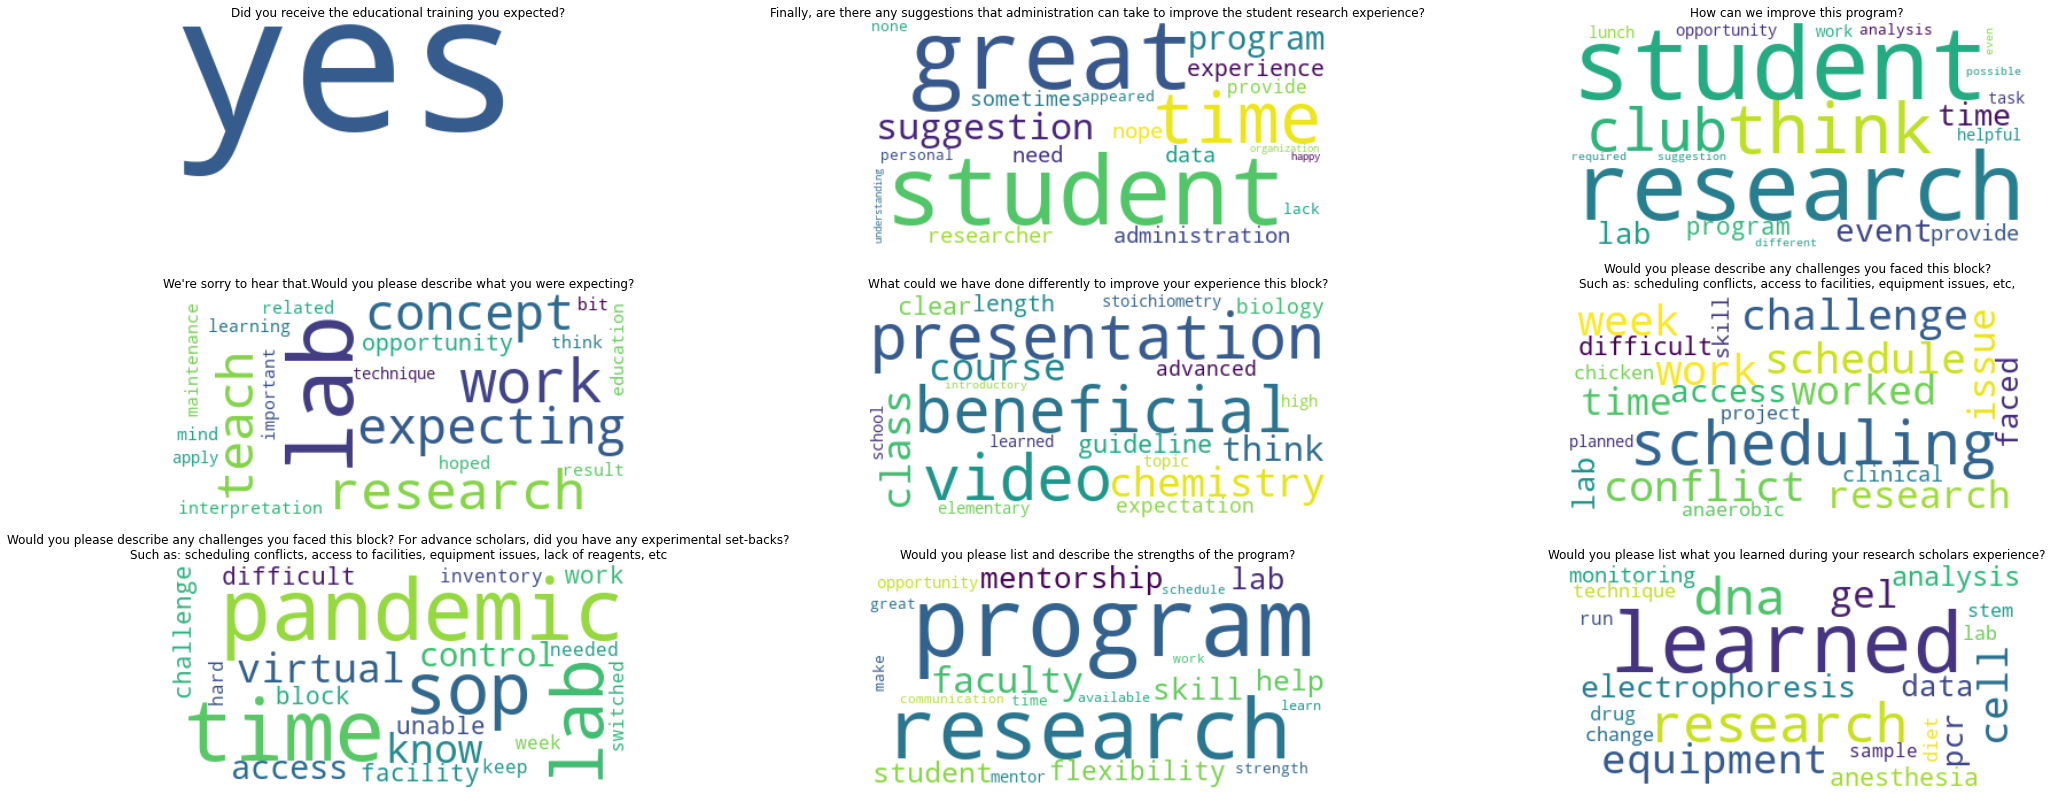

In [12]:
features = result.feature
nbr_features = len(result.feature)
fig = plt.figure(figsize=(30,15))
fig.subplots_adjust(hspace=1, wspace=0.2)
for cat, num in zip(features, range(1,nbr_features)):
    df0=result[result['feature']==cat]['lemm_tokens']
    text = convert_text(df0)
    cloud = WordCloud(background_color="white", max_words=20, stopwords=cust_nltk_sw, collocations=False).generate(text)
    ax = fig.add_subplot(4,3, num)
    ax.imshow(cloud, interpolation='bilinear')
    ax.set_title(cat)
    ax.axis('off')

plt.tight_layout()
plt.show()

<hr style='border-top: 2px solid black;'>

# Code Explanation

<strong>Line 1:</strong><br>
<code>features = result.feature</code>
 - Saves a pandas series containing the features (title) of the wordclouds

<strong>Line 2:</strong><br>
<code>nbr_features = len(result.feature)</code>
 - The number of features that will be plotted

<strong>Line 3:</strong><br>
<code>fig = plt.figure(figsize=(30,15))</code>
 - create a figure object that is 30 by 15

<strong>Line 4:</strong><br>
<code>fig.subplots_adjust(hspace=1, wspace=0.2)</code>
 - adjust the spaces around each subplot

<strong>Line 5:</strong><br>
<code>for cat, num in zip(features, range(1,nbr_features)):</code>
 - use a for loop to iteratue through both the features and the number of features 

<strong>Line 6:</strong><br>
<code>df0=result[result['feature']==cat]['lemm_tokens']</code>
 - extract the series of lemminized tokens from the dataframe for the specific feature

<strong>Line 7:</strong><br>
<code>text = convert_text(df0)</code>
 - Combine all the tokens into a single string using custom function

<strong>Line 8:</strong><br>
<code>cloud = WordCloud(background_color="white", max_words=20, stopwords=cust_nltk_sw, collocations=False).generate(text)</code>
 - Create wordcloud object with white background, maximum 20 words, and applying a filter that removes word from custom list.

<strong>Line 9:</strong><br>
<code>ax = fig.add_subplot(4,3, num)</code>
 - Add a subplot to the grid. The grid is 4 by 3, and num is the position

<strong>Line 10:</strong><br>
<code>ax.imshow(cloud, interpolation='bilinear')</code>
 - Display data as an image

<strong>Line 11-12:</strong><br>
<code>ax.set_title(cat)</code><br>
<code>ax.axis('off')</code>
 - Adds a title and removes the axis grid

<strong>Line 13-14:</strong><br>
<code>plt.tight_layout()</code><br>
<code>plt.show()</code>
 - Adjusts subplot and display them. 